# Data Upload

In [3]:
# 필요 library import 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 패키지 임포트
import os
import warnings

# FutureWarning 제거
warnings.simplefilter(action='ignore', category = FutureWarning)

# os 에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else :
    font_family = "Apple Gothic"
    

# -값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

In [66]:
# data read
total_data = pd.read_csv('total_dataset.csv', encoding='euc-kr', index_col= ["EMD_NM"])

# Basic statistics

In [3]:
total_data.head()

,TRAD,CONCERT,OLD,MART,LIB,ART,MUS,MED,COMM,SPORT,OWN,JOB,CARROT,CHARGE
EMD_NM,,,,,,,,,,,,,,
연제동,0,0,0,0,3,0,0,0,0,3,0,0,2,0
운암동,1,2,1,0,13,1,0,13,3,3,6,135,3,3
덕림동,0,0,1,0,0,0,0,0,0,1,0,0,0,1
삼거동,0,0,3,0,0,0,0,3,0,1,0,0,0,0
북구_동림동,0,0,1,0,6,0,0,3,1,6,6,27,2,3


In [4]:
total_data.describe()

,TRAD,CONCERT,OLD,MART,LIB,ART,MUS,MED,COMM,SPORT,OWN,JOB,CARROT,CHARGE
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.119171,0.113990,0.492228,0.113990,1.818653,0.088083,0.041451,1.378238,0.502591,2.865285,3.497409,30.896373,0.383420,0.575130
std,0.434568,0.417659,0.823605,0.429948,3.367007,0.405063,0.199849,2.581372,0.791388,4.089174,11.208314,74.808990,0.900309,1.097252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1.000000,3.000000,2.000000,26.000000,0.000000,1.000000
max,3.000000,3.000000,4.000000,3.000000,16.000000,4.000000,1.000000,18.000000,4.000000,20.000000,102.000000,553.000000,5.000000,5.000000


In [5]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 연제동 to 충장동
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   TRAD     193 non-null    int64
 1   CONCERT  193 non-null    int64
 2   OLD      193 non-null    int64
 3   MART     193 non-null    int64
 4   LIB      193 non-null    int64
 5   ART      193 non-null    int64
 6   MUS      193 non-null    int64
 7   MED      193 non-null    int64
 8   COMM     193 non-null    int64
 9   SPORT    193 non-null    int64
 10  OWN      193 non-null    int64
 11  JOB      193 non-null    int64
 12  CARROT   193 non-null    int64
 13  CHARGE   193 non-null    int64
dtypes: int64(14)
memory usage: 22.6+ KB


# Missing Value

In [6]:
total_data.isnull()

,TRAD,CONCERT,OLD,MART,LIB,ART,MUS,MED,COMM,SPORT,OWN,JOB,CARROT,CHARGE
EMD_NM,,,,,,,,,,,,,,
연제동,False,False,False,False,False,False,False,False,False,False,False,False,False,False
운암동,False,False,False,False,False,False,False,False,False,False,False,False,False,False
덕림동,False,False,False,False,False,False,False,False,False,False,False,False,False,False
삼거동,False,False,False,False,False,False,False,False,False,False,False,False,False,False
북구_동림동,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
쌍촌동,False,False,False,False,False,False,False,False,False,False,False,False,False,False
내방동,False,False,False,False,False,False,False,False,False,False,False,False,False,False
덕흥동,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
total_data.isnull().sum()

TRAD       0
CONCERT    0
OLD        0
MART       0
LIB        0
ART        0
MUS        0
MED        0
COMM       0
SPORT      0
OWN        0
JOB        0
CARROT     0
CHARGE     0
dtype: int64

## Min-Max Scaler 진행

In [133]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(total_data)

In [134]:
# 표준화된 행렬 -> 데이터프레임 변환 
scaled_data = pd.DataFrame(scaled_data, columns=total_data.columns)

In [135]:
# 독립변수 ( data )
X = scaled_data.iloc[:,:-1]

In [136]:
# 종속변수 ( target )
y = scaled_data.iloc[:,-1]

In [137]:
# 흔련, 테스트 데이터 분리 - Scaled Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  1. 다중선형 회귀분석 ver.1

## 1-1) 다중선형 회귀분석 모델

In [11]:
# 법정동 코드 : EMD_CD, 충전소 개수 : CHARGE를 제외한 칼럼들은 X
X = total_data[total_data.columns.difference(['EMD_NM','CHARGE'])]

y = total_data['CHARGE']

In [12]:
# train : test = 80 : 20, random_state = 42 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify = y)

In [72]:
lr = linear_model.LinearRegression()

In [73]:
lr_model = lr.fit(X_train, y_train)

In [74]:
# trained_coef
print(lr_model.coef_)

[ 0.50415513  0.10541845 -0.07528002 -0.08819547  0.17040393  0.18195803
 -0.06339811  0.35113517  0.02100506  0.21999401  0.14953574  0.45152978
 -0.04447084]


In [75]:
# trained_intercept
print(lr_model.intercept_)

-0.002388952167177341


## 1-2) 기존 값과 예측 값 비교

In [46]:
x_new = X_test
y_new = lr_model.predict(x_new)
print(type(y_test))

<class 'pandas.core.series.Series'>


In [47]:
y_compare = {'y_test' : y_test, 'y_predicted' : y_new}

In [48]:
y_compare = pd.DataFrame(y_compare)
y_compare

,y_test,y_predicted
27,0.0,0.008224
182,0.8,0.861074
102,0.6,0.345810
143,0.0,0.008611
171,0.0,-0.002389
71,0.0,-0.018072
139,0.0,-0.040029
160,0.0,-0.002389
37,0.0,0.052260
101,0.0,0.019610


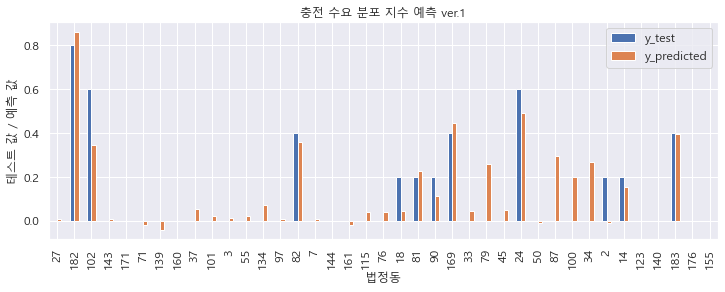

In [49]:
ax = y_compare.plot(kind = 'bar', title = '충전 수요 분포 지수 예측 ver.1', 
                   figsize = (12, 4), legend = True, fontsize = 12)
ax.set_xlabel('법정동', fontsize = 12)
ax.set_ylabel('테스트 값 / 예측 값', fontsize = 12)
ax.legend(['y_test', 'y_predicted'], fontsize = 12)

## 1-3) Performance ver.1

In [50]:
# R2 Score(결정계수)
print(f'훈련 세트의 정확도 : {lr_model.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {lr_model.score(X_test, y_test)}')
print(f'사용한 특성의 수 : {np.sum(lr_model.coef_ != 0)}')

훈련 세트의 정확도 : 0.6860575880300621
테스트 세트의 정확도 : 0.7171574232060234
사용한 특성의 수 : 13


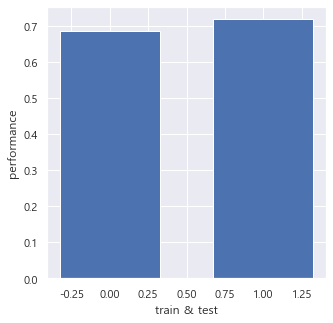

In [51]:
visualize = [lr_model.score(X_train, y_train), lr_model.score(X_test, y_test)]

plt.figure(figsize=(5,5))
plt.bar(range(len(visualize)), visualize, width=0.65)
plt.ylabel('performance')
plt.xlabel('train & test')
plt.show()

# Improved Performance - 1

## vif가 높은 feature 제거

<AxesSubplot:>

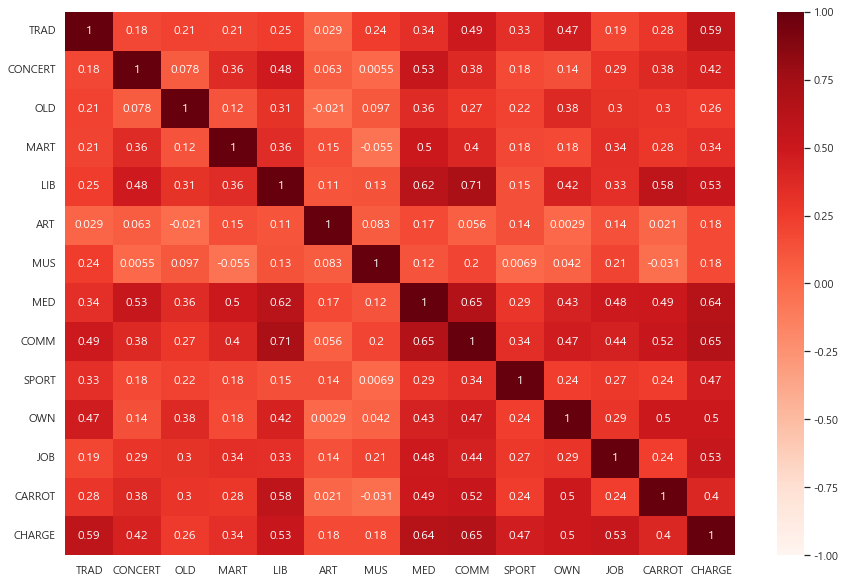

In [138]:
# Heatmap
total_data_corr = scaled_data.copy()
plt.rcParams['figure.figsize'] = (15, 10)

sns.heatmap(total_data_corr.corr(), annot = True, cmap = 'Reds', vmin = -1, vmax = 1)

In [139]:
total_data_corr.columns

Index(['TRAD', 'CONCERT', 'OLD', 'MART', 'LIB', 'ART', 'MUS', 'MED', 'COMM',
       'SPORT', 'OWN', 'JOB', 'CARROT', 'CHARGE'],
      dtype='object')

In [140]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(total_data_corr.values, i) for i in range(total_data_corr.shape[1])]
vif['features'] = total_data_corr.columns.values
vif

,VIF,features
0,2.194235,TRAD
1,1.819474,CONCERT
2,1.760653,OLD
3,1.578607,MART
4,3.804537,LIB
5,1.161986,ART
6,1.265390,MUS
7,3.726044,MED
8,4.409671,COMM
9,1.882926,SPORT


In [143]:
# vif가 4 이상인 feature 제거 : 'COMM' 컬럼 제거
total_data_corr = total_data_corr.drop(['COMM'], axis = 1).copy()
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(total_data_corr.values, i) for i in range(total_data_corr.shape[1])]
vif['features'] = total_data_corr.columns
vif

,VIF,features
0,2.060164,TRAD
1,1.778992,CONCERT
2,1.744271,OLD
3,1.568070,MART
4,2.868981,LIB
5,1.139530,ART
6,1.254635,MUS
7,3.550147,MED
8,1.794854,SPORT
9,2.053399,OWN


In [144]:
vif.features.values

array(['TRAD', 'CONCERT', 'OLD', 'MART', 'LIB', 'ART', 'MUS', 'MED',
       'SPORT', 'OWN', 'JOB', 'CARROT', 'CHARGE'], dtype=object)

# 2. 다중선형 회귀분석 ver.2

## 2-1) 다중선형 회귀모델

In [145]:
total_data_corr_re.columns

Index(['TRAD', 'CONCERT', 'OLD', 'MART', 'LIB', 'ART', 'MUS', 'MED', 'SPORT',
       'OWN', 'JOB', 'CARROT', 'CHARGE'],
      dtype='object')

In [146]:
# VIF가 4이상인 컬럼인 'COMM' 컬럼 제거
total_data_corr_re = total_data_corr.copy()
X = total_data_corr_re[total_data_corr_re.columns.difference(['CHARGE'])]
y = total_data_corr_re['CHARGE']

In [147]:
# train : test = 80 : 20, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [148]:
lr = linear_model.LinearRegression()
lr_model2 = lr.fit(X_train, y_train)

In [149]:
# trained_coef
print(lr_model2.coef_)

[ 0.18054887 -0.04397676  0.10370071  0.45594597  0.17927066 -0.08545189
  0.36042124 -0.06308532 -0.07667678  0.14895877  0.2212915   0.51050651]


In [150]:
# trained_intercept
print(lr_model2.intercept_)

-0.0019721559922395715


## 2-2) 기존 값과 예측 값 비교

In [151]:
x_new = X_test
y_new = lr_model2.predict(x_new)

In [152]:
y_compare2 = {'y_test' : y_test, 'y_predicted' : y_new}

In [153]:
y_compare2 = pd.DataFrame(y_compare2)

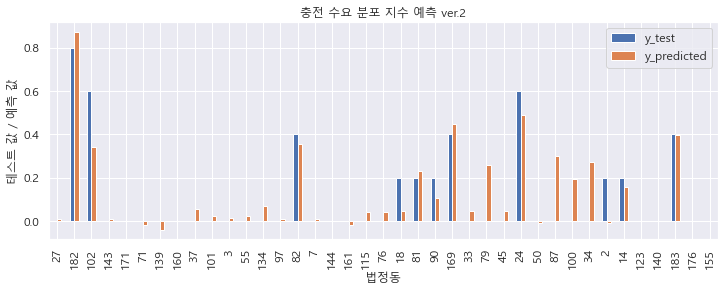

In [154]:
ax = y_compare2.plot(kind = 'bar', title = '충전 수요 분포 지수 예측 ver.2', 
                   figsize = (12, 4), legend = True, fontsize = 12)
ax.set_xlabel('법정동', fontsize = 12)
ax.set_ylabel('테스트 값 / 예측 값', fontsize = 12)
ax.legend(['y_test', 'y_predicted'], fontsize = 12)

## 2-3) Performance ver.2

In [155]:
# R2 Score(결정계수)
print(f'훈련 세트의 정확도 : {lr_model2.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {lr_model2.score(X_test, y_test)}')
print(f'사용한 특성의 수 : {np.sum(lr_model2.coef_ != 0)}')

훈련 세트의 정확도 : 0.6859507900819471
테스트 세트의 정확도 : 0.7119450264569627
사용한 특성의 수 : 12


 # Improved Performance - 2

## feature의 p-value 검정

In [156]:
import statsmodels.api as sms

X_train = sms.add_constant(X_train)
lr_remodel = sms.OLS(y_train, X_train).fit()
print(lr_remodel.summary())

                            OLS Regression Results                            
Dep. Variable:                 CHARGE   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     25.66
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           9.68e-30
Time:                        16:05:10   Log-Likelihood:                 101.78
No. Observations:                 154   AIC:                            -177.6
Df Residuals:                     141   BIC:                            -138.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0020      0.015     -0.135      0.8

# 3. 다중선형 회귀분석 ver.3

## 3-1) 다중선형 회귀모델

In [165]:
# t값의 절댓값이 낮은 컬럼인 'CARROT' 제거 및 잔차가 가장 높은 컬럼인 'MUS' 제거 
total_data_corr_re = total_data_corr.drop(['CARROT', 'MUS'], axis=1).copy()

X = total_data_corr_re[total_data_corr_re.columns.difference(['CHARGE'])]
y = total_data_corr_re['CHARGE']

In [166]:
# train : test = 80 : 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [167]:
lr = linear_model.LinearRegression()
lr_model3 = lr.fit(X_train, y_train)

## 3-2) 기존 값과 예측 값 비교

In [168]:
x_new = X_test
y_new = lr_model3.predict(x_new)

In [169]:
y_compare3 = {'y_test' : y_test, 'y_predicted' : y_new}

In [170]:
y_compare3 = pd.DataFrame(y_compare3)

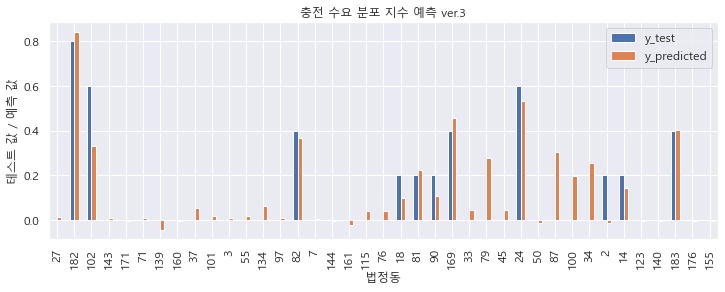

In [171]:
ax = y_compare3.plot(kind = 'bar', title = '충전 수요 분포 지수 예측 ver.3', 
                   figsize = (12, 4), legend = True, fontsize = 12)
ax.set_xlabel('법정동', fontsize = 12)
ax.set_ylabel('테스트 값 / 예측 값', fontsize = 12)
ax.legend(['y_test', 'y_predicted'], fontsize = 12)

## 3-3) Performance ver.3

In [172]:
# R2 Score(결정계수)
print(f'훈련 세트의 정확도 : {lr_model3.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {lr_model3.score(X_test, y_test)}')
print(f'사용한 특성의 수 : {np.sum(lr_model3.coef_ != 0)}')

훈련 세트의 정확도 : 0.6830524920856065
테스트 세트의 정확도 : 0.7218430245279018
사용한 특성의 수 : 10


# 4. 최종 모델 선택에 따른 예측 값 도출

In [173]:
X_test_total = total_data_corr_re[total_data_corr_re['CHARGE'] >= 0].iloc[:, :-1]
y_pred_total = lr_model3.predict(X_test_total)
y_pred_df_total = pd.DataFrame(y_pred_total, columns=['charge_demand'])

In [174]:
# charge_true(최종 수요 지수) = 1차 수요 지수(y_pred_total) - 기설치 충전기 대수 (y)
charge_true = y_pred_total - y
total_df = {'fir_coef' : y_pred_total, 'charge_count' : y ,'final_coef' : charge_true}
total_df = pd.DataFrame(total_df)
charge_demand_coef = total_df[total_df['final_coef']>= 0.5].sort_values(by = 'final_coef', ascending = False)
charge_demand_coef

,fir_coef,charge_count,final_coef
87,0.611537,0.0,0.611537


In [45]:
# 최종 수요 지수 데이터 프레임을 엑셀로 내보내기
charge_demand_coef.to_excel('charge_demand_coef.xlsx')